<a href="https://colab.research.google.com/github/murilofarias10/AnaliseComPython/blob/main/Modelo_IA_Previsao_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd #importando biblioteca pandas

In [4]:
base_dados = pd.read_csv("basedados.csv") #importando base de dados

In [5]:
display(base_dados) #imprimindo base de dados

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
print(base_dados.info()) #verificando a integridade da base de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


In [7]:
import seaborn as sns #importando biblioteca seaborn utilizada para estatisticas
import matplotlib.pyplot as plt #importando biblioteca para visualização grafica

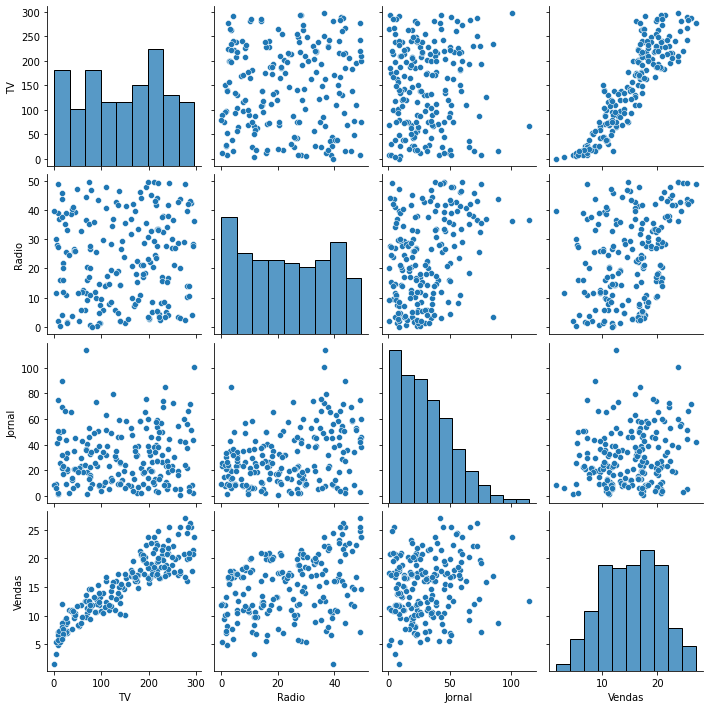

In [8]:
sns.pairplot(base_dados) #pairplot é o tipo de grafico que estamos utilizando da biblioteca seaborn
plt.show() #utilizando o matplotlib será exibido o grafico realizado com seaborn

#Foi gerado um grafico de disperção comparando as 4 colunas 

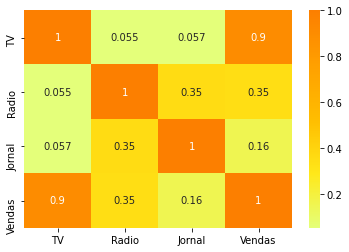

In [9]:
#utilizando o metodo heatmap 
#Entendendo .corr() para correlação , cmap = indica paleta de cores , True significa que os numero devem aparecer no grafico
sns.heatmap(base_dados.corr(), cmap = 'Wistia', annot = True)
plt.show()

In [10]:
#criando um modelo de inteligencia artificial
#para calcular as futuras vendas de acordo com os investimentos em meios de comunicação

from sklearn.model_selection import train_test_split #importando parte da biblioteca sklearn.model_selection

#x será os inputs do modelo eixo X [será os valores nos diferentes meios de comunicação]
#y será os outputs do modelo eixo Y [será a previsão de vendas de acordo com os valores inseridos]

x = base_dados.drop('Vendas', axis=1) # excluindo a coluna vendas da base de dados para compor eixo X
y = base_dados['Vendas'] #recebera os valores de venda de acordo com os investimentos


In [11]:
#agora precisamos 1º treinar o modelo e 2º testar o modelo
#como nossa base de dados existem 200 linhas com informações, vamos utilizar:
#opção 1: utilizar 200 linhas para treinar
#opção 2: utilizar 200 linhas para testar
#opção 3: utlizar parte para treinar e parte para testar <<<<<<
#                                        train_teste_split metodo que permite a divisao dos dados para treino e teste
#                                                            30% será para teste e 70% será para treino
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

In [12]:
#utilizando metodo de regressão
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np #biblioteca para calculos matematicos

In [13]:
#TREINO INTELIGENCIA ARTIFICIAL

#metodo REGRESSÃO LINEAR
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train) #utilizando apenas variaveis de treino

#metodo RANDOM FOREST
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train) #utilizando apenas variaveis de treino

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [14]:
#TESTES INTELIGENCIA ARTIFICIAL

test_pred_lin = lin_reg.predict(x_test)

test_pred_rf = rf_reg.predict(x_test)

#Utilizando 2 indicadores estatisticos R² e o RSME
r2_lin = metrics.r2_score(y_test, test_pred_lin)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))
print(f"R² da Regressão linear: {r2_lin}")
print(f"RSME da Regressão linear:{rmse_lin}")
print("\n")
r2_rf = metrics.r2_score(y_test, test_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))
print(f"R² da Random Forest: {r2_rf}")
print(f"RSME da Random Forest:{rmse_rf}")

R² da Regressão linear: 0.9071151423684272
RSME da Regressão linear:1.539694765603124


R² da Random Forest: 0.9607393705178553
RSME da Random Forest:1.0010155010454813


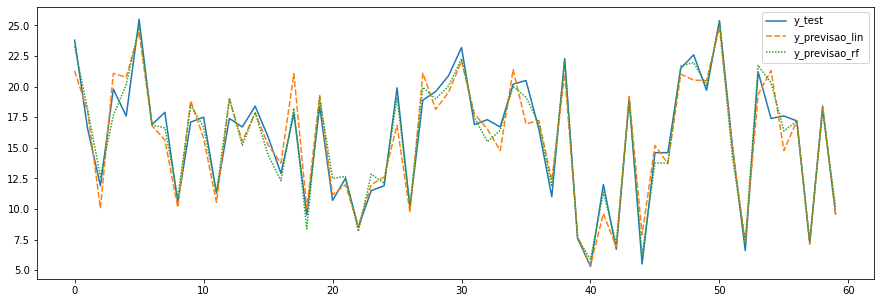

,y_test,y_previsao_lin,y_previsao_rf
0,23.8,21.288161,23.299
1,16.6,18.042132,18.171
2,11.9,10.059590,12.648
3,19.8,21.082241,17.646
4,17.6,20.764760,20.163
5,25.5,24.471874,24.917
6,16.9,16.806436,16.874
7,17.9,15.628857,16.626
8,10.5,10.124799,10.949
9,17.1,18.846019,18.475


In [15]:
#Gerando Grafico com Resultado
base_dados_resultado = pd.DataFrame() #pd do panda
#base_dados_resultado.index = x_teste

base_dados_resultado['y_test'] = y_test #Linha Azul
base_dados_resultado['y_previsao_lin'] = test_pred_lin # Verde Regressão Linear
base_dados_resultado['y_previsao_rf'] = test_pred_rf #Laranja #Random Forest

base_dados_resultado = base_dados_resultado.reset_index(drop=True)

fig=plt.figure(figsize=(15,5))
sns.lineplot(data=base_dados_resultado)
plt.show()
display(base_dados_resultado)

#O grafico mostra os testes todos os 60 pontos (Total = 200*30% = 60 pontos)
#Linha azul representa os dados reais (valor de venda da base real)
#Linha laranja representa a previsão de vendas calculada pelo metodo de Regressão Linear
#Linha verde representa a previsão de vendas calculada pela metodo de Random Forest 
#RESULTADO:
#R² da Regressão linear: 0.9071151423684273
#R² da Random Forest: 0.9639035311234372

               0
TV      0.852818
Radio   0.128815
Jornal  0.018367


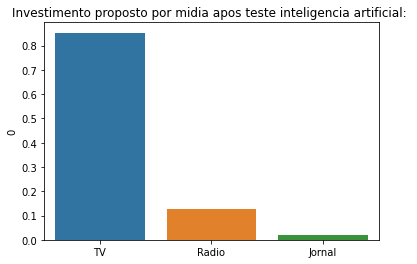

In [38]:
#Como o modelo Random Forest foi o melhor
#R² da Regressão linear: 0.9071151423684273
#R² da Random Forest: 0.9639035311234372

#Vamos verificar a caracteristica
verificando_caracteristica = pd.DataFrame(rf_reg.feature_importances_, x_train.columns) #pd do panda

plt.figure(figsize=(6,4))
sns.barplot(x=verificando_caracteristica.index, y=verificando_caracteristica[0])
plt.title("Investimento proposto por midia apos teste inteligencia artificial: ")
print(verificando_caracteristica)
plt.show()

In [17]:
print(base_dados)

        TV  Radio  Jornal  Vendas
0    230.1   37.8    69.2    22.1
1     44.5   39.3    45.1    10.4
2     17.2   45.9    69.3    12.0
3    151.5   41.3    58.5    16.5
4    180.8   10.8    58.4    17.9
..     ...    ...     ...     ...
195   38.2    3.7    13.8     7.6
196   94.2    4.9     8.1    14.0
197  177.0    9.3     6.4    14.8
198  283.6   42.0    66.2    25.5
199  232.1    8.6     8.7    18.4

[200 rows x 4 columns]


Investimento em: TV 73%
Investimento em: Jornal 15%
Investimento em: Radio 12%


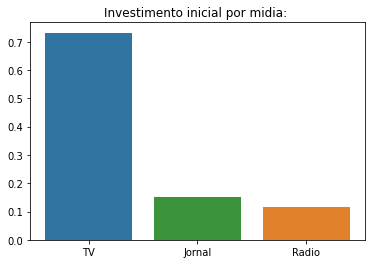

<Figure size 720x360 with 0 Axes>

In [30]:
#Informações iniciais (antes do metodo de IA verificar a previsão)
base_dados["Total"] = base_dados["TV"] + base_dados["Radio"] + base_dados["Jornal"]
a = (sum(base_dados['TV'])) / (sum(base_dados['Total']))
b = (sum(base_dados['Radio'])) / (sum(base_dados['Total']))
c = (sum(base_dados['Jornal'])) / (sum(base_dados['Total']))

total = a + b + c
print('Investimento em: TV {0:.0%}'.format(a))
print('Investimento em: Jornal {0:.0%}'.format(c))
print('Investimento em: Radio {0:.0%}'.format(b))


#Gerando tabela
grupos = ['TV', 'Jornal', 'Radio']
valores = [a,c,b]
plt.bar(grupos, valores, color=['#3274a1', '#3a923a', '#e1812c'])
plt.title("Investimento inicial por midia: ")
plt.figure(figsize=(10,5))
plt.show()


In [73]:
#Diferença
Final_TV = 0.852818
Final_Radio = 0.128815
Final_Jornal = 0.018367

diferenca_TV = (('{0:.0%}'.format(Final_TV - a) * 100)) #a = inicial TV
diferenca_Radio = ('{0:.0%}'.format(Final_Radio - b) * 100) #b = inicial Radio
diferenca_Jornal = ('{0:.0%}'.format(Final_Jornal - c) * 100) #c = inicial Jornal


print('Diferença TV:', diferenca_TV)
print('Diferenca Radio:', diferenca_Radio)
print('Diferenca Jornal:', diferenca_Jornal)

Diferença TV: 12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%12%
Diferenca Radio: 1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%1%
Diferenca Jornal: -13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%-13%
